  # POST-SENSE:   ML-BASED INSTAGRAM ENGAGEMENT PREDICTOR

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

df = pd.read_csv('dataset.csv', encoding='latin1')
print(df)


     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

### DATA CLEANING & PRE-PROCESSING

In [4]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [99]:
df.tail()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
114,13700,5185,3041,5352,77,573,2,38,373,73,80,23,3
115,5731,1923,1368,2266,65,135,4,1,148,20,18,6,35
116,4139,1133,1538,1367,33,36,0,1,92,34,10,7,35
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,23,3
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,1,45


In [100]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [101]:
df.shape

(119, 13)

In [102]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303,43.630252,25.689076
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580,26.374379,15.913297
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,0.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000,21.500000,13.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000,41.000000,25.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000,65.500000,38.500000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000,89.000000,53.000000


In [103]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Impressions     119 non-null    int64
 1   From Home       119 non-null    int64
 2   From Hashtags   119 non-null    int64
 3   From Explore    119 non-null    int64
 4   From Other      119 non-null    int64
 5   Saves           119 non-null    int64
 6   Comments        119 non-null    int64
 7   Shares          119 non-null    int64
 8   Likes           119 non-null    int64
 9   Profile Visits  119 non-null    int64
 10  Follows         119 non-null    int64
 11  Caption         119 non-null    int64
 12  Hashtags        119 non-null    int64
dtypes: int64(13)
memory usage: 12.2 KB


In [105]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Caption']=le.fit_transform(df['Caption'])
df['Hashtags']=le.fit_transform(df['Hashtags'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### VISUALIZATIONS

C:\Users\HP\AppData\Local\Temp\ipykernel_7808\1019397718.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_totals.index, y=source_totals.values, palette='viridis')


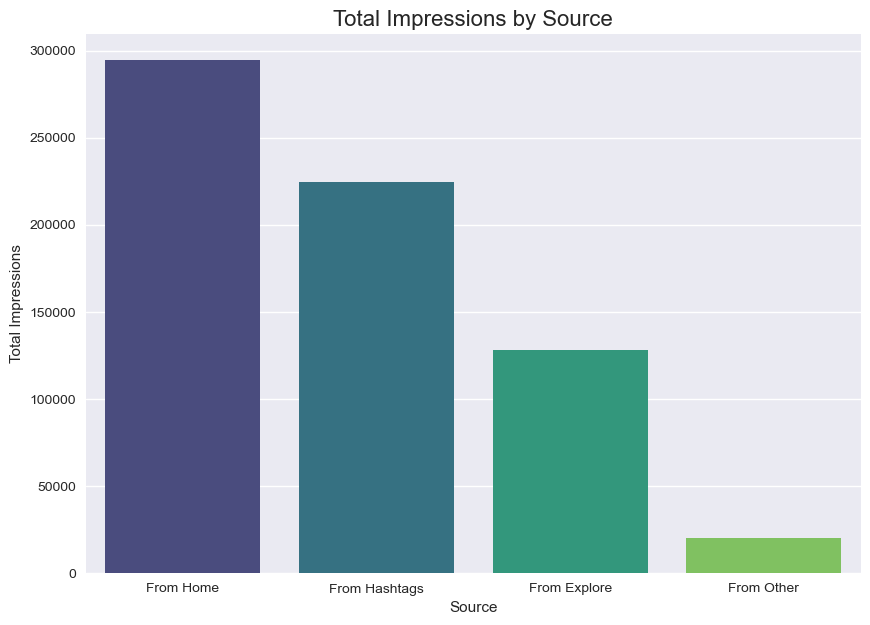

In [6]:
#  Total Impressions by Source 

# Calculate the sum of impressions from each source
impression_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
source_totals = df[impression_sources].sum().sort_values(ascending=False)

#  bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x=source_totals.index, y=source_totals.values, palette='viridis')

plt.title('Total Impressions by Source', fontsize=16)
plt.xlabel('Source')
plt.ylabel('Total Impressions')
plt.show()


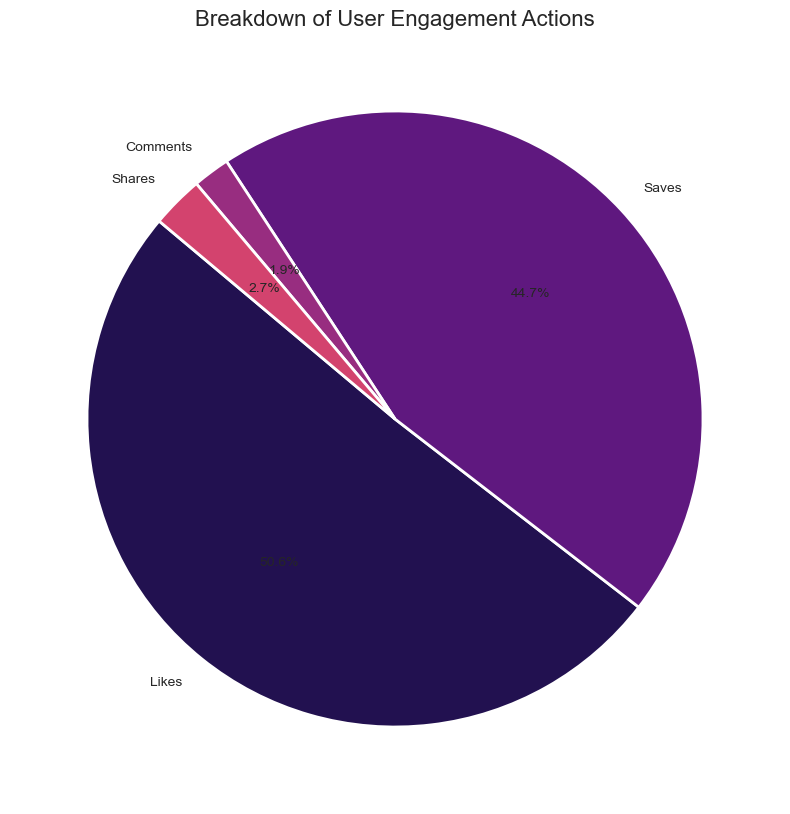

In [7]:
#  Breakdown of Engagement Actions 

# Calculate the sum of all engagement actions
engagement_actions = {
    'Likes': df['Likes'].sum(),
    'Saves': df['Saves'].sum(),
    'Comments': df['Comments'].sum(),
    'Shares': df['Shares'].sum()
}
engagement_df = pd.Series(engagement_actions)

# pie chart
plt.figure(figsize=(12, 10))
plt.pie(engagement_df, labels=engagement_df.index, autopct='%1.1f%%',
        startangle=140, wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
        colors=sns.color_palette('magma'))

plt.title('Breakdown of User Engagement Actions', fontsize=16)
plt.show()



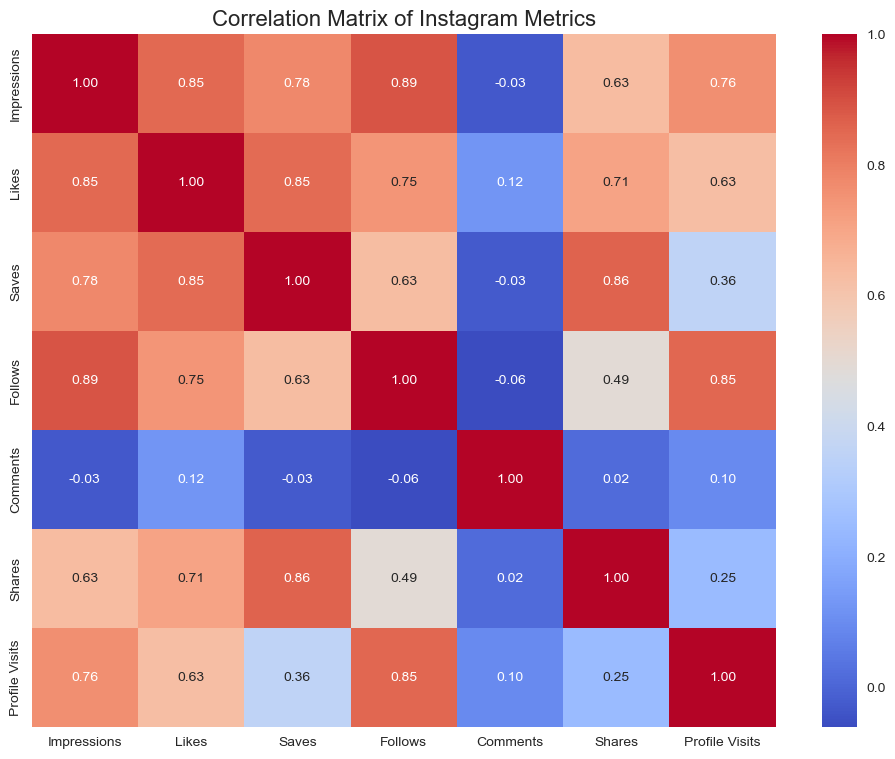

In [12]:
# --- Graph 3: Correlation Between Key Metrics (Heatmap) ---

# Select the columns you want to see correlations for
corr_cols = ['Impressions', 'Likes', 'Saves', 'Follows', 'Comments', 'Shares', 'Profile Visits']
correlation_matrix = df[corr_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Instagram Metrics', fontsize=16)
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_7808\1088890074.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discovery_Source', data=df, palette='magma',


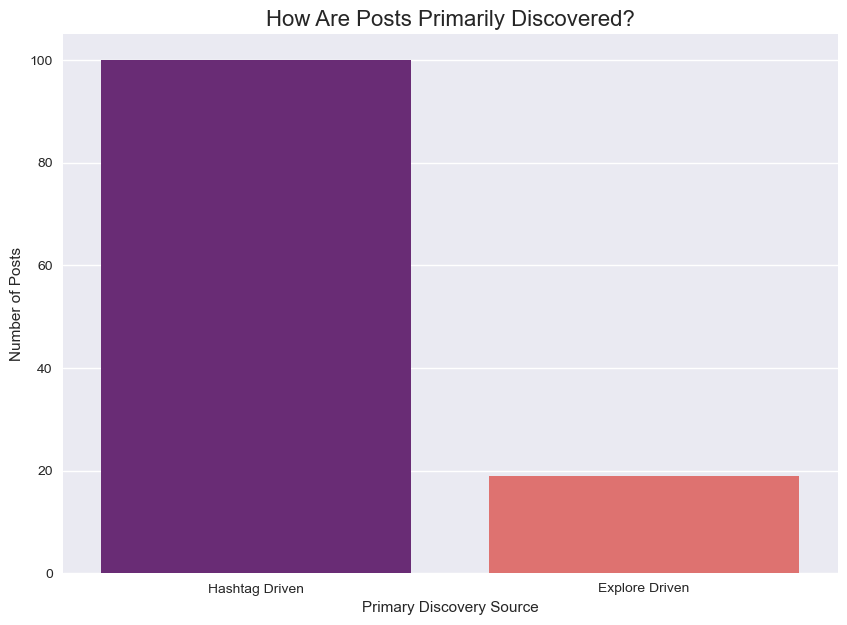

In [13]:
#  Primary Discovery Source of Posts
def get_discovery_source(row):
    if row['From Hashtags'] > row['From Explore']:
        return 'Hashtag Driven'
    elif row['From Explore'] > row['From Hashtags']:
        return 'Explore Driven'
    else:
        return 'Other/Equal'

df['Discovery_Source'] = df.apply(get_discovery_source, axis=1)

#  count plot
plt.figure(figsize=(10, 7))
sns.countplot(x='Discovery_Source', data=df, palette='magma', 
              order=df['Discovery_Source'].value_counts().index)

plt.title('How Are Posts Primarily Discovered?', fontsize=16)
plt.xlabel('Primary Discovery Source')
plt.ylabel('Number of Posts')
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_7808\2796963918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Primary_Engagement', data=df, palette='crest',


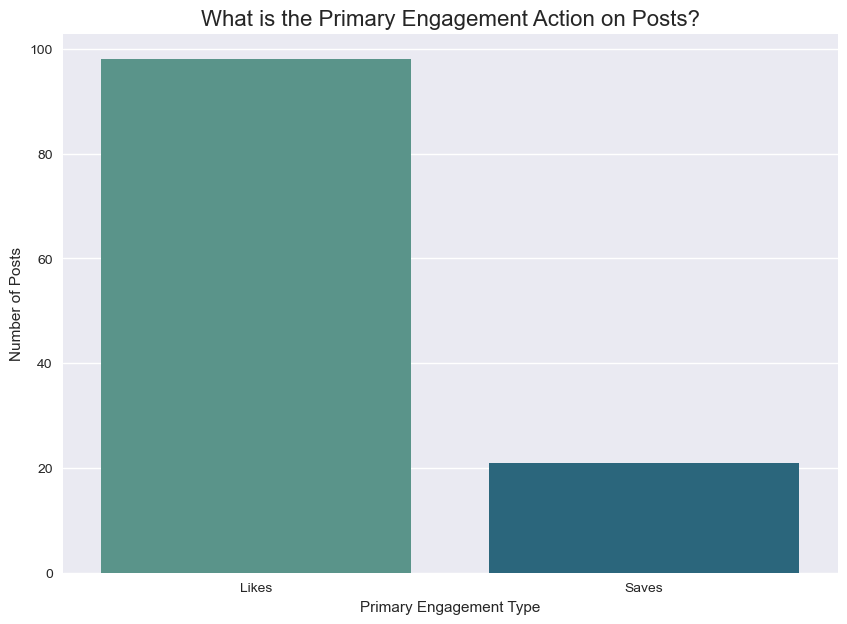

In [17]:
#  Primary Engagement Type (Countplot)
engagement_cols = ['Likes', 'Saves', 'Comments', 'Shares']
df['Primary_Engagement'] = df[engagement_cols].idxmax(axis=1)

#  count plot
plt.figure(figsize=(10, 7))
sns.countplot(x='Primary_Engagement', data=df, palette='crest', 
              order=df['Primary_Engagement'].value_counts().index)

plt.title('What is the Primary Engagement Action on Posts?', fontsize=16)
plt.xlabel('Primary Engagement Type')
plt.ylabel('Number of Posts')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7808\878394428.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_counts.index, y=total_counts.values, palette='plasma')


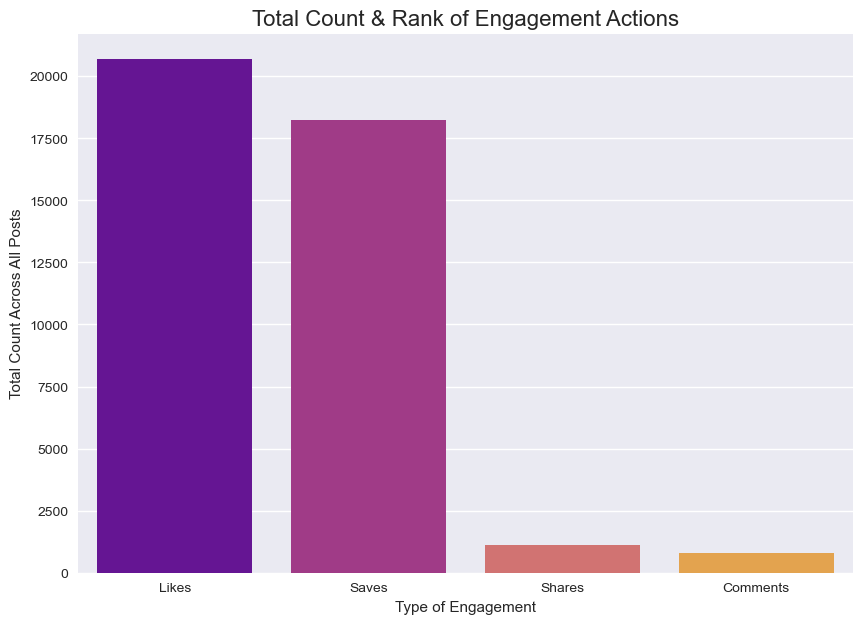

In [44]:
# To compare the total counts across multiple columns, a bar plot is the perfect tool.

# Select the engagement columns you want to count and rank
engagement_cols = ['Likes', 'Saves', 'Comments', 'Shares']

# Calculate the total sum for each of these columns and sort them
total_counts = df[engagement_cols].sum().sort_values(ascending=False)

# Create the bar plot to visualize the ranked totals
plt.figure(figsize=(10, 7))
sns.barplot(x=total_counts.index, y=total_counts.values, palette='plasma')

plt.title('Total Count & Rank of Engagement Actions', fontsize=16)
plt.xlabel('Type of Engagement')
plt.ylabel('Total Count Across All Posts')
plt.show()


### Dashboard


Generating visualizations...


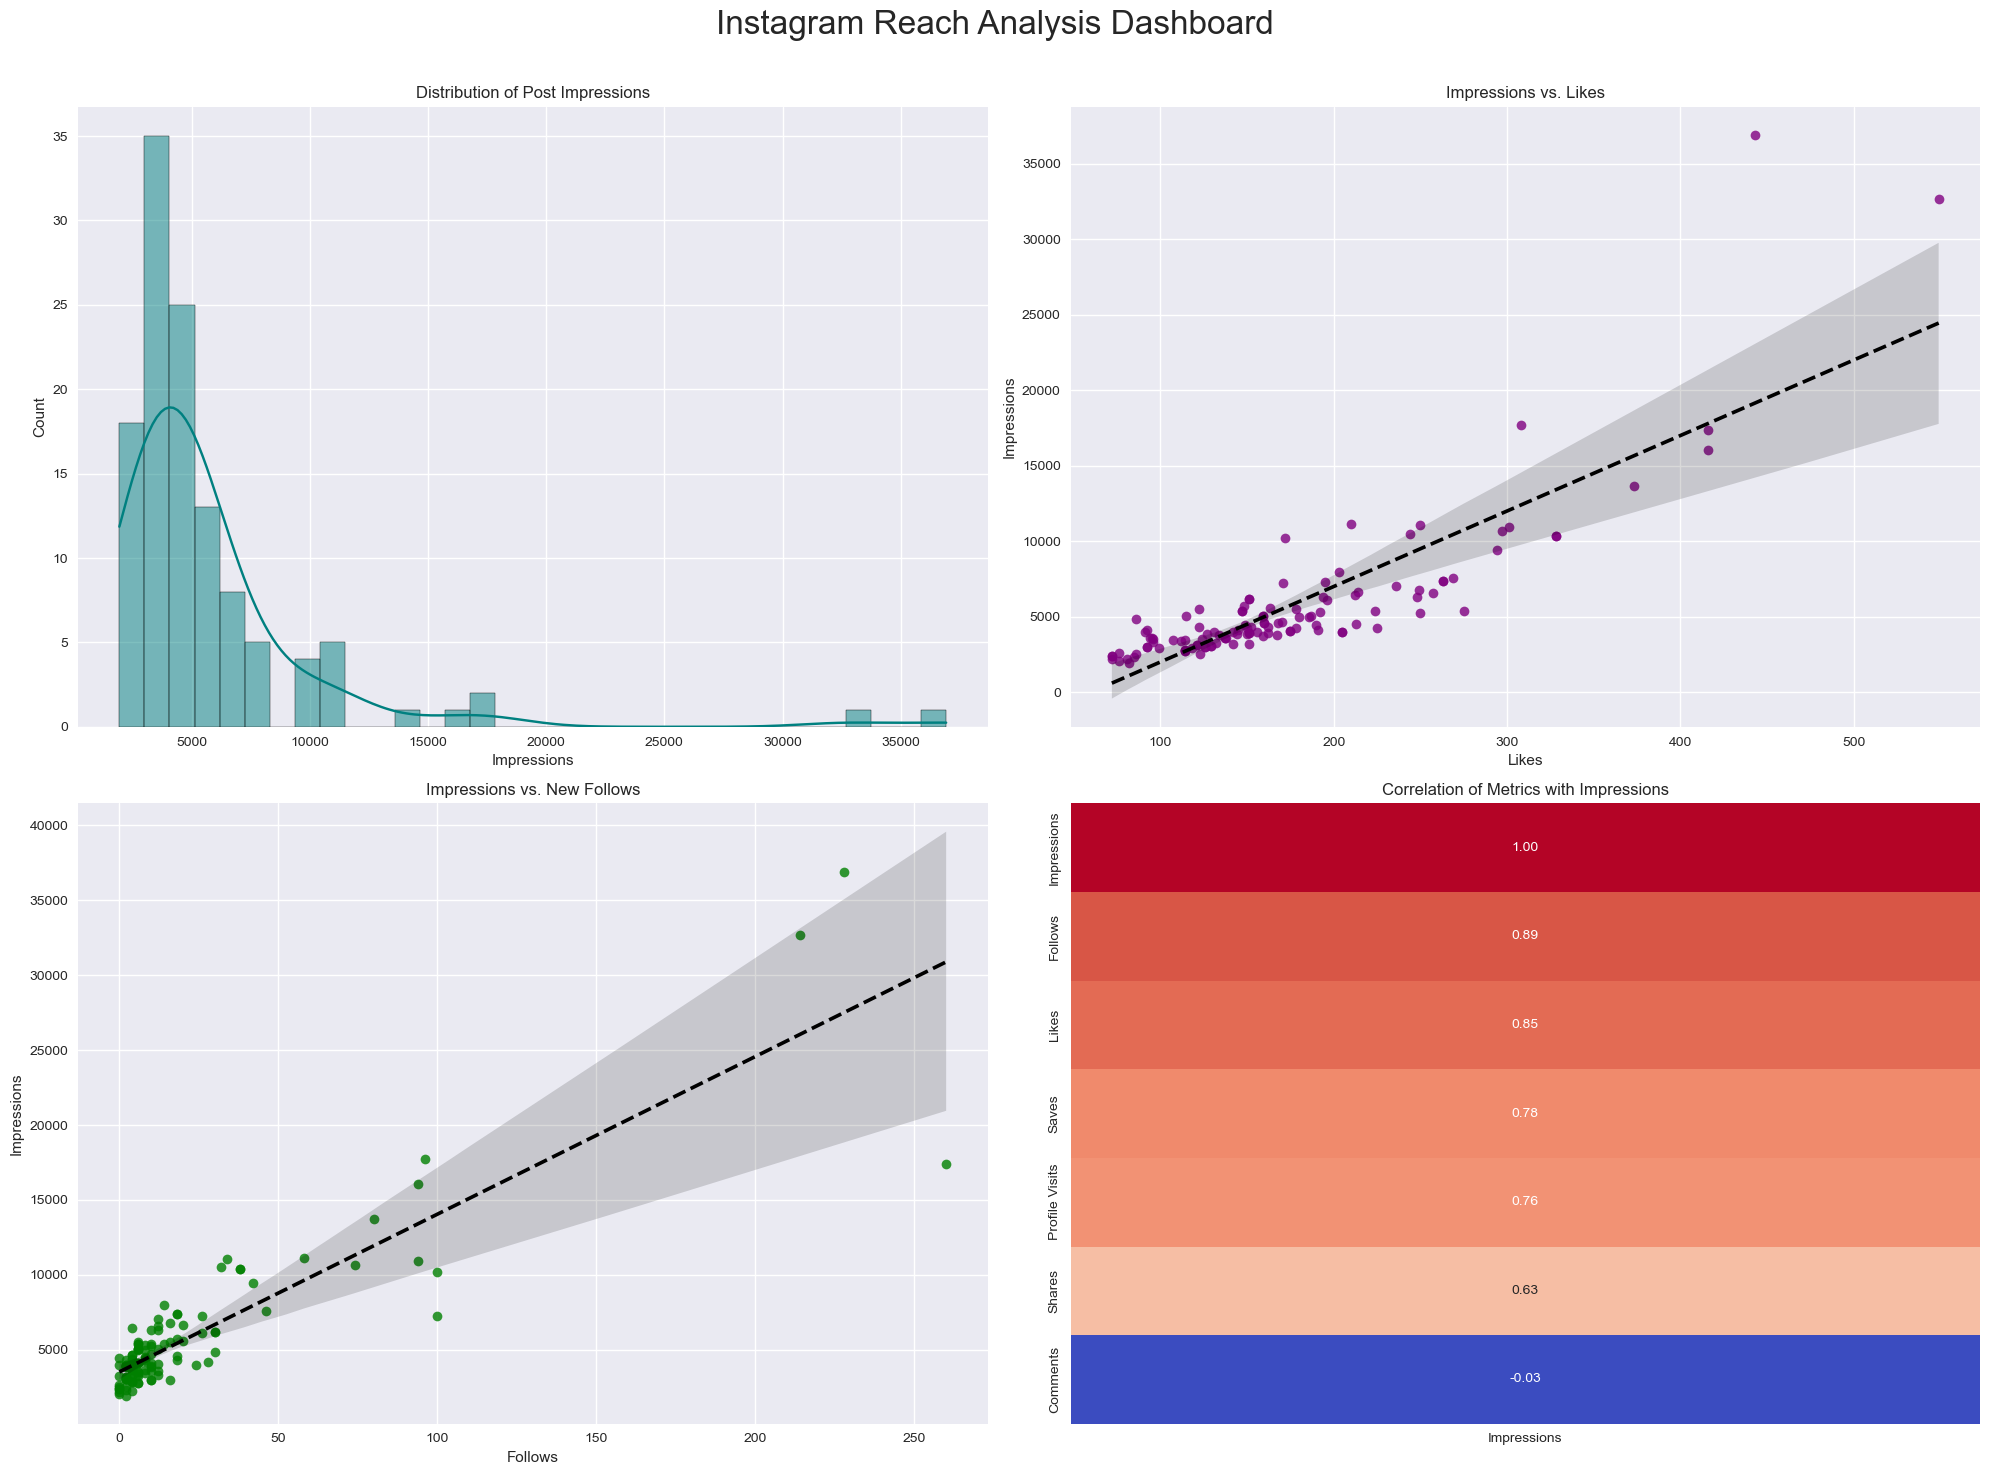

In [35]:
#Exploratory Data Analysis (EDA) 

print("\nGenerating visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Instagram Reach Analysis Dashboard', fontsize=24)

# Plot 1: Distribution of Impressions (Reach)
sns.histplot(ax=axes[0, 0], data=df, x='Impressions', kde=True, color='teal')
axes[0, 0].set_title('Distribution of Post Impressions')

# Plot 2: Impressions vs. Likes
sns.regplot(ax=axes[0, 1], data=df, x='Likes', y='Impressions', color='purple', line_kws={'color':'black', 'linestyle':'--'})
axes[0, 1].set_title('Impressions vs. Likes')

# Plot 3: Impressions vs. Follows
sns.regplot(ax=axes[1, 0], data=df, x='Follows', y='Impressions', color='green', line_kws={'color':'black', 'linestyle':'--'})
axes[1, 0].set_title('Impressions vs. New Follows')

# --- New Plot 4: Correlation Heatmap ---
# This plot shows how strongly each metric is related to Impressions.
# Values closer to 1.0 (dark red) indicate a strong positive relationship.
corr_cols = ['Impressions', 'Likes', 'Saves', 'Follows', 'Comments', 'Shares', 'Profile Visits']
correlation_matrix = df[corr_cols].corr()

# We select and sort by 'Impressions' to make the heatmap a clear, ranked list.
sns.heatmap(ax=axes[1, 1], data=correlation_matrix[['Impressions']].sort_values(by='Impressions', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
axes[1, 1].set_title('Correlation of Metrics with Impressions')

# Adjust layout and display the complete figure
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### MODEL PERFORMANCE


--- Model Performance Summary ---
                   R-squared         RMSE
Linear Regression   0.877798  2178.545184
Random Forest       0.880354  2155.636418

Generating model comparison plots...


C:\Users\HP\AppData\Local\Temp\ipykernel_7808\1649857273.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=results_df_sorted_r2.index, y=results_df_sorted_r2['R-squared'], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_7808\1649857273.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=results_df_sorted_rmse.index, y=results_df_sorted_rmse['RMSE'], palette='plasma')


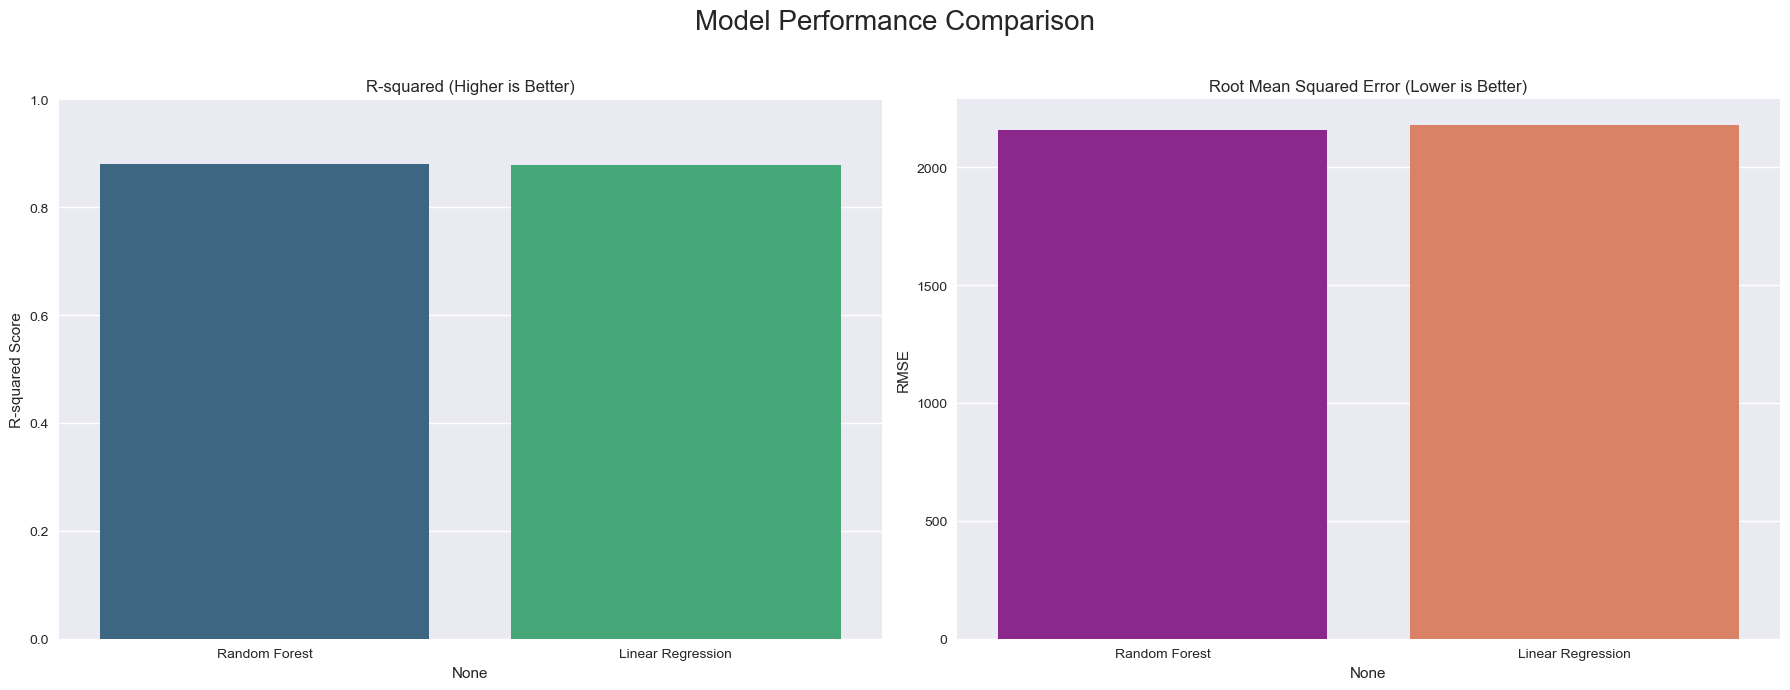

In [52]:
# Create the results_df DataFrame from the results dictionary
# The keys 'R-squared' and 'RMSE' will become the column names.
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Summary ---")
print(results_df)


# --- 4. Visual Model Comparison (Your Code) ---
# This code will now run without error because results_df is guaranteed
# to have a column named 'R-squared'.
print("\nGenerating model comparison plots...")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Performance Comparison', fontsize=20)

# Sort by R-squared for better visualization
results_df_sorted_r2 = results_df.sort_values('R-squared', ascending=False)

# Plot R-squared scores
sns.barplot(ax=axes[0], x=results_df_sorted_r2.index, y=results_df_sorted_r2['R-squared'], palette='viridis')
axes[0].set_title('R-squared (Higher is Better)')
axes[0].set_ylabel('R-squared Score')
axes[0].set_ylim(0, 1.0)

# Sort by RMSE for better visualization
results_df_sorted_rmse = results_df.sort_values('RMSE', ascending=True)

# Plot RMSE scores
sns.barplot(ax=axes[1], x=results_df_sorted_rmse.index, y=results_df_sorted_rmse['RMSE'], palette='plasma')
axes[1].set_title('Root Mean Squared Error (Lower is Better)')
axes[1].set_ylabel('RMSE')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### MODEL TRAINING & TESTING

In [47]:
#Model Preparation 

features = ['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']
target = 'Impressions'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model
}

results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {'R-squared': r2, 'RMSE': rmse}

# Create the results_df DataFrame from the results dictionary
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Summary ---")
print(results_df)


--- Training Linear Regression ---
--- Training Random Forest ---

--- Model Performance Summary ---
                   R-squared         RMSE
Linear Regression   0.877798  2178.545184
Random Forest       0.880354  2155.636418


In [48]:
#  Model Training and Evaluation 

# Import the necessary models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a dictionary to store models and their results
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model
}

results = {}

# Loop through each model to train, predict, and evaluate
for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the unseen test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results for comparison
    results[name] = {'R-squared': r2, 'RMSE': rmse}
    
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}\n")

# Convert results to a DataFrame for a clear summary
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Summary ---")
print(results_df)


--- Training Linear Regression ---
R-squared: 0.8778
RMSE: 2178.55

--- Training Random Forest ---
R-squared: 0.8804
RMSE: 2155.64


--- Model Performance Summary ---
                   R-squared         RMSE
Linear Regression   0.877798  2178.545184
Random Forest       0.880354  2155.636418


### RESULTS


Training the prediction model...
Model training and prediction complete.

Model Performance (R-squared): 89.50%
This means the model can explain approximately 90% of the variance in Instagram reach.

--- Sample of Prediction Results ---
     Actual Reach  Predicted Reach  Prediction Error %
56           4978             4830               -2.97
89           7407             7060               -4.68
4            2518             3633               44.28
45           4298             4864               13.17
26           5394             4761              -11.74
117         32695            24500              -25.06
69           3601             3922                8.91
10           2218             2664               20.11
90          10386            13335               28.39
73           5542             4512              -18.59


C:\Users\HP\AppData\Local\Temp\ipykernel_7808\3499017837.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')


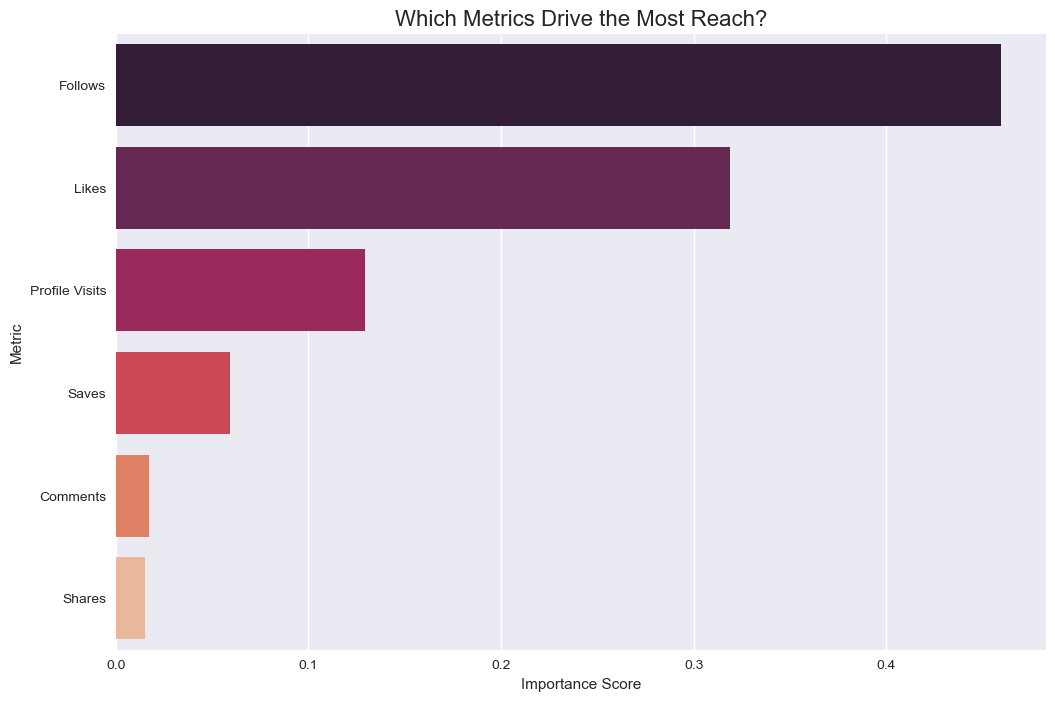


Most and Least Important Metrics for Predicting Reach 
Most Important:
        Feature  Importance
       Follows    0.459835
         Likes    0.318953
Profile Visits    0.129513

Least Important:
  Feature  Importance
   Saves    0.059535
Comments    0.017177
  Shares    0.014987


In [53]:
# Initialize and train a powerful RandomForestRegressor model
print("\nTraining the prediction model...")
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Use the trained model to make predictions
y_pred = model.predict(X_test)
print("Model training and prediction complete.")

#5. Prediction Results and Percentages 
# Calculate the model's accuracy (R-squared score)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance (R-squared): {r2:.2%}")
print(f"This means the model can explain approximately {r2:.0%} of the variance in Instagram reach.")

# Create a DataFrame to show actual vs. predicted results with percentage error
results_df = pd.DataFrame({
    'Actual Reach': y_test.astype(int),
    'Predicted Reach': y_pred.astype(int)
})
results_df['Prediction Error %'] = ((results_df['Predicted Reach'] - results_df['Actual Reach']) / results_df['Actual Reach']) * 100
results_df['Prediction Error %'] = results_df['Prediction Error %'].round(2)

print("\n--- Sample of Prediction Results ---")
print(results_df.head(10).to_string())


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')
plt.title('Which Metrics Drive the Most Reach?', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Metric')
plt.show()

print("\nMost and Least Important Metrics for Predicting Reach ")
print("Most Important:\n", feature_importance.head(3).to_string(index=False))
print("\nLeast Important:\n", feature_importance.tail(3).to_string(index=False))

